Rede Neural

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, root_mean_squared_log_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("DistanciaEMediasPevs.csv", delimiter=",")

X = data.drop("MediaRendimento", axis=1)
X = X.drop("PEV", axis=1)
y = data.MediaRendimento

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
hidden_layers = (200,100,50,25)
mlp_model = MLPRegressor(
    hidden_layer_sizes=hidden_layers,
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.0003,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    n_iter_no_change=25
)

mlp_model.fit(X_train,y_train)

y_Predito = mlp_model.predict(X_test)

In [23]:
mae = mean_absolute_error(y_test, y_Predito)
mqe = mean_squared_error(y_test, y_Predito)
rmqe = root_mean_squared_error(y_test, y_Predito)
rmqle = root_mean_squared_log_error(y_test, y_Predito)
r2 = r2_score(y_test, y_Predito)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mqe}")
print(f"Root Mean Squared Error: {rmqe}")
print(f"Root Mean Squared Log Error: {rmqle}")
print(f"R Squared: {r2}")

Mean Absolute Error: 94.60529635474285
Mean Squared Error: 18319.13207837734
Root Mean Squared Error: 135.3481883084415
Root Mean Squared Log Error: 0.39063820166255553
R Squared: 0.0048577936627566265


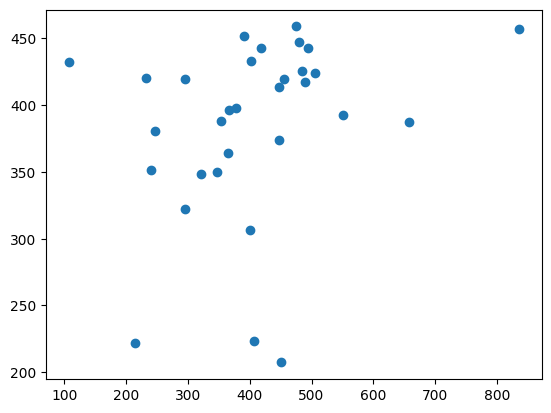

In [25]:
plt.scatter(y_test, y_Predito)
plt.show()

Meu modelo

Calcula a distância para todos os outros registros do conjunto

In [2]:
from math import radians, sin, cos, sqrt, atan2
from myModel import myModel

In [3]:
def distancia(lat1,long1,lat2,long2):
    R = 6371  # Raio da Terra em km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, long1, lat2, long2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c # Retorna distancia em km

In [4]:
def geraTabelaComDistancias(dataset):
    
    distCols = ["distanciaPev" + str(i) for i in dataset.index]
    newDf = pd.DataFrame(columns=["latitude", "longitude"] + distCols)

    for i,row in dataset.iterrows():
        cols = np.zeros(len(distCols)+2)
        cols[0] = row["latitude"]
        cols[1] = row["longitude"]
        k=2
        for j, rowj in dataset.iterrows():
            cols[k] = distancia(row["latitude"], row["longitude"], rowj["latitude"], rowj["longitude"])
            k +=1
        newDf.loc[len(newDf)] = cols
    
    return newDf    

In [8]:
df = pd.read_csv("localERendimento.csv", delimiter=",", index_col="PEV")

X = df.drop("MediaRendimento", axis=1)
y = df.MediaRendimento

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

X_train = geraTabelaComDistancias(X_train)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

Minimiza função f(x) do meu modelo

In [9]:
from scipy.optimize import minimize

In [10]:
model = myModel()

x0 = [1,2,3,4]

res = minimize(lambda params: model.fit(params, X_train, y_train), x0)

print(res)
print("Melhores parâmetros:", res.x)
print("Erro mínimo:", res.fun)

d:\Trabalho\Nova pasta\pev\myModel.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  valor = self.f(params, row[j])


  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.9479375459379226e-24
        x: [ 1.000e+00  2.000e+00  3.000e+00  4.000e+00]
      nit: 0
      jac: [-7.194e-17 -8.390e-17 -5.856e-17 -1.952e-18]
 hess_inv: [[1 0 0 0]
            [0 1 0 0]
            [0 0 1 0]
            [0 0 0 1]]
     nfev: 5
     njev: 1
Melhores parâmetros: [1. 2. 3. 4.]
Erro mínimo: 4.9479375459379226e-24
